In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def split_dataset(dataset, column, y, barrier):
    """
    Splits a dataset into training and test sets based on a condition applied to the target column.

    Parameters:
    - dataset: pd.DataFrame, the input dataset
    - x_columns: list of str, the names of the feature columns (X)
    - y: pd.DataFrame, the name of the target column (Y)
    - condition: callable, a function that takes a column (Y) and returns a boolean mask
    - test_size: float, the proportion of the dataset to include in the test split (default: 0.2)
    - random_state: int, random seed for reproducibility (default: None)

    Returns:
    - X_train, X_test, y_train, y_test: pd.DataFrame, pd.DataFrame, pd.Series, pd.Series
    """

    # Create the training and test sets based on the mask
    
    indices = np.where(dataset[column]<barrier)[0]
    indices = indices.tolist()
    print(len(dataset[column].values))
    all_indices = range(len(dataset[column].values))
    test_indices = list(set(all_indices) - set(indices))
    

    X_train = dataset.iloc[indices, :]
    X_test = dataset.iloc[test_indices, :]
    y_train = y.iloc[indices, :]
    y_test = y.iloc[test_indices, :]

    return X_train, X_test, y_train, y_test


In [3]:
filename = r"C:\Users\Antoi\Documents\Master\ML\project2\cell_density_50.csv"  #load xenium data
output = pd.read_csv(filename)
densities = output.iloc[:, -1]

filename = r"C:\Users\Antoi\Documents\Master\ML\project2\data_loaded.csv"  #load xenium data
data = pd.read_csv(filename)
print(data.columns)

Index(['cell_id', 'x_centroid', 'y_centroid', 'transcript_counts',
       'total_counts', 'cell_area', 'nucleus_area', 'ABCC11', 'ACE2', 'ACKR1',
       ...
       'TSPAN19', 'UBE2C', 'UMOD', 'UPK3B', 'VCAN', 'VSIG4', 'VWA5A', 'VWF',
       'cell_boundaries', 'nucleus_boundaries'],
      dtype='object', length=386)


In [4]:
x_cols = ['y_centroid']
barrier = 2300
X_train, X_test, y_train, y_test = split_dataset(data, x_cols, output, barrier)
y_train = y_train.iloc[:,-1]
y_test = y_test.iloc[:, -1]


162254


95253


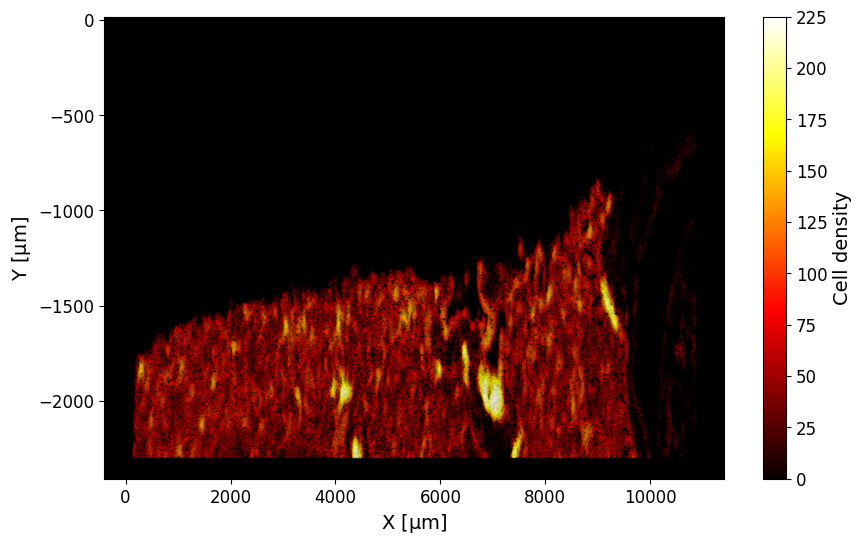

In [5]:
plt.figure(figsize=(10, 6))
print(len(X_train['x_centroid'].values))
ax= plt.gca()
#heatmap = plt.pcolormesh(grid_x_50, -grid_y_50, grid_z_masked_50, shading='auto', cmap='hot')
heatmap = plt.hexbin(X_train['x_centroid'].values, -X_train['y_centroid'].values, C=y_train, gridsize=5000, reduce_C_function=np.mean, cmap='hot')
ax.set_facecolor('black')
cbar = plt.colorbar(heatmap)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='Cell density', fontsize = 14)
ax.set_xlabel(r"X [$\mathrm{\mu m}$]", fontsize= 14)
ax.set_ylabel(r"Y [$\mathrm{\mu m}$]", fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
#plt.savefig(r"C:\Users\Antoi\Documents\Master\ML\project2\heatmap_density_20.eps", format = 'eps', bbox_inches='tight')
plt.show()

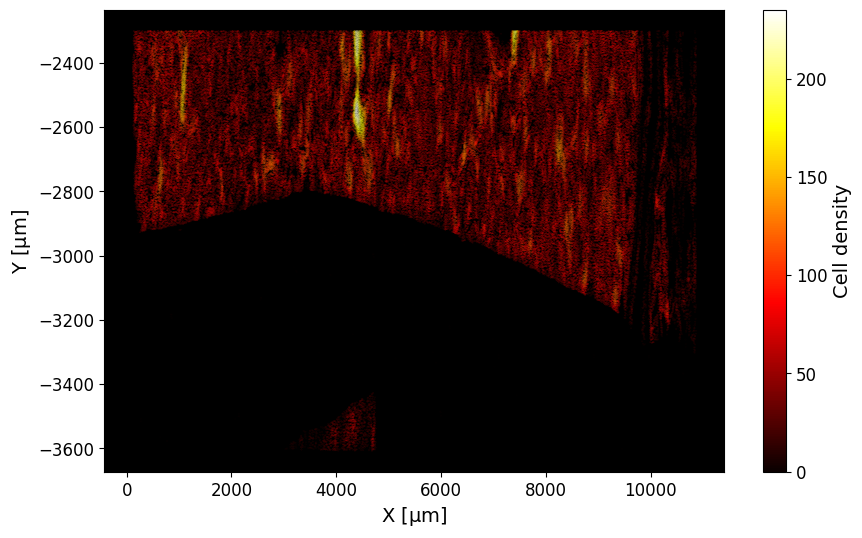

In [6]:
plt.figure(figsize=(10, 6))
ax= plt.gca()
#heatmap = plt.pcolormesh(grid_x_50, -grid_y_50, grid_z_masked_50, shading='auto', cmap='hot')
heatmap = plt.hexbin(X_test['x_centroid'].values, -X_test['y_centroid'].values, C=y_test, gridsize=5000, reduce_C_function=np.mean, cmap='hot')
ax.set_facecolor('black')
cbar = plt.colorbar(heatmap)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='Cell density', fontsize = 14)
ax.set_xlabel(r"X [$\mathrm{\mu m}$]", fontsize= 14)
ax.set_ylabel(r"Y [$\mathrm{\mu m}$]", fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
#plt.savefig(r"C:\Users\Antoi\Documents\Master\ML\project2\heatmap_density_20.eps", format = 'eps', bbox_inches='tight')
plt.show()